In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.genfromtxt('Engagement ratio.csv', delimiter=',')
print(data)

[0.00014921 0.03204704 0.07161051 ... 0.12606084 0.09834898 0.00127969]


In [3]:
mean_pop = np.mean(data)
std_pop = np.std(data)
print('population mean:' , mean_pop)
print('population std:', std_pop)

population mean: 0.07726584465256987
population std: 0.10720956480669144


In [4]:
def get_mean(data):
    mean_pop = np.mean(data)
    return mean_pop

In [5]:
def get_std(data):
    std_pop = np.std(data)
    return std_pop

In [6]:
data_mean = get_mean(data)
data_std = get_std(data)

In [37]:
def get_sets_of_samples(data,num_sets=1000,sample_size=30,seed=111):
    np.random.seed(seed)
    sets_of_samples = np.random.choice(data, size=(num_sets, sample_size), replace=True)
    return sets_of_samples

sets_of_samples = get_sets_of_samples(data)

In [8]:
def get_mean_sample_set(sets_of_sample):
    mean_sample_set = []
    mean_sample_set = np.mean(sets_of_sample, axis=1)
    return mean_sample_set

In [9]:
def get_std_sample_set(sets_of_sample):
    std_sample_set = []
    std_sample_set = np.std(sets_of_sample, axis=1)
    return std_sample_set

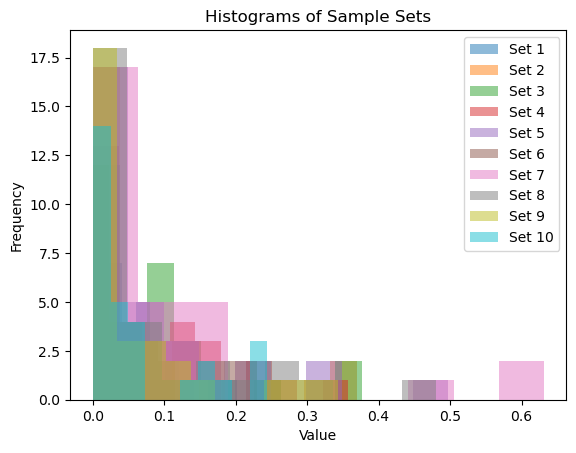

In [10]:
sets_of_samples = get_sets_of_samples(data, num_sets=10)

for i in range(10):
    current_sample_set = sets_of_samples[i]
    plt.hist(current_sample_set, bins=10, alpha=0.5, label=f'Set {i+1}')
    
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Sample Sets')
plt.legend()
plt.show()

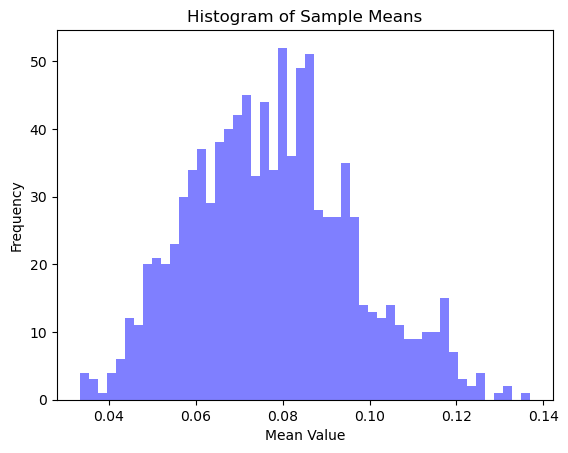

In [11]:
sets_of_samples = get_sets_of_samples(data, num_sets=1000)
mean_sample_set = get_mean_sample_set(sets_of_samples)

plt.hist(mean_sample_set, bins=50, alpha=0.5, color='blue')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

In [12]:
import scipy.stats as stats

def get_95_bounds(mean_sample_set):
    alpha = 0.05
    lower_bound, upper_bound = stats.norm.interval((1 - alpha), loc=get_mean(mean_sample_set), scale=get_std(mean_sample_set))
    return lower_bound,upper_bound

In [13]:
lower_b = get_95_bounds(get_mean_sample_set(get_sets_of_samples(data)))[0]
upper_b = get_95_bounds(get_mean_sample_set(get_sets_of_samples(data)))[1]

In [43]:
print("95% bounds for sample size of 30:")
print("Lower Bound:", lower_b)
print("Upper Bound:", upper_b)

95% bounds for sample size of 30:
Lower Bound: 0.04084467954523576
Upper Bound: 0.11454926441222349


In [15]:
import scipy.stats as stats

def get_95_ci(mean_sample_set=mean_sample_set):
    confidence_level = 0.95
    alpha = 1 - confidence_level
    
    std_sample_set = np.std(data)
    
    z_score = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z_score * (std_sample_set / np.sqrt(30))
    
    mean_of_means = np.mean(mean_sample_set)
    
    lower_bound = mean_of_means - margin_of_error
    upper_bound = mean_of_means + margin_of_error
    return lower_bound,upper_bound

In [16]:
lower_b_ci = get_95_ci()[0]
upper_b_ci = get_95_ci()[1]

In [45]:
print("95% bounds using z_table for the sample size of 30:")
print("Lower Bound:", lower_b_ci)
print("Upper Bound:", upper_b_ci)

95% bounds using z_table for the sample size of 30:
Lower Bound: 0.039333226878210156
Upper Bound: 0.1160607170792491


In [18]:
def calculate_coverage_percentage(data, num_sets=1000, sample_size=30):
    coverage_count = 0

    for _ in range(num_sets):
        sample = np.random.choice(data, size=sample_size, replace=True)

        lower_bound, upper_bound = get_95_ci(sample)

        population_mean = np.mean(data)
        if lower_bound <= population_mean <= upper_bound:
            coverage_count += 1

    coverage_percentage = (coverage_count / num_sets) * 100
    return coverage_percentage

In [38]:
print(f"Coverage percnetage for the sample size of 30: {calculate_coverage_percentage(data)}")

Coverage percnetage for the sample size of 30: 95.19999999999999


In [39]:
sets_of_samples = get_sets_of_samples(data, num_sets=1000, sample_size=200)
mean_sample_set_2 = get_mean_sample_set(sets_of_samples)

## Histogram of Sample Means

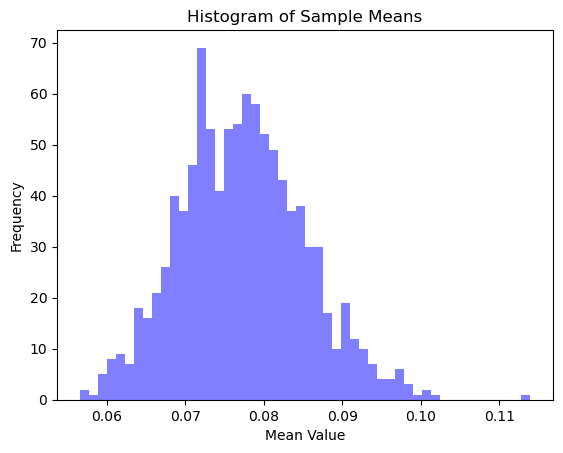

In [40]:
plt.hist(mean_sample_set_2, bins=50, alpha=0.5, color='blue')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

## get_95_bounds

In [21]:
lower_b_2 = get_95_bounds(mean_sample_set_2)[0]
upper_b_2 = get_95_bounds(mean_sample_set_2)[1]

In [46]:
print("95% bounds for the sample size of 200:")
print("Lower Bound:", lower_b_2)
print("Upper Bound:", upper_b_2)

95% bounds for the sample size of 200:
Lower Bound: 0.06158992106289276
Upper Bound: 0.09297405771599915


## get_95_ci

In [23]:
import scipy.stats as stats

def get_95_ci_2(mean_sample_set=mean_sample_set):
    confidence_level = 0.95
    alpha = 1 - confidence_level
    
    std_sample_set = np.std(data)
    
    z_score = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z_score * (std_sample_set / np.sqrt(200))
    
    mean_of_means = np.mean(mean_sample_set)
    
    lower_bound = mean_of_means - margin_of_error
    upper_bound = mean_of_means + margin_of_error
    return lower_bound,upper_bound

In [24]:
lower_b_ci_2 = get_95_ci_2(mean_sample_set_2)[0]
upper_b_ci_2 = get_95_ci_2(mean_sample_set_2)[1]

In [47]:
print("95% bounds using z_table for the sample size of 200:")
print("Lower Bound:", lower_b_ci_2)
print("Upper Bound:", upper_b_ci_2)

95% bounds using z_table for the sample size of 200:
Lower Bound: 0.06242377480220013
Upper Bound: 0.09214020397669179


## coverage_percentage

In [26]:
def calculate_coverage_percentage_2(data, num_sets=1000, sample_size=200):
    coverage_count = 0

    for _ in range(num_sets):
        sample = np.random.choice(data, size=sample_size, replace=True)

        lower_bound, upper_bound = get_95_ci_2(sample)

        population_mean = np.mean(data)
        if lower_bound <= population_mean <= upper_bound:
            coverage_count += 1

    coverage_percentage = (coverage_count / num_sets) * 100
    return coverage_percentage

In [48]:
print(f"Coverage percnetage for the sample size of 200: {calculate_coverage_percentage(data)}")

Coverage percnetage for the sample size of 200: 95.89999999999999


## Comparison

- **Sample Size of 30**:
  - Lower Bound: 0.0408
  - Upper Bound: 0.1145
  - Coverage Percentage: 95.2%
  
- **Sample Size of 200**:
  - Lower Bound: 0.0616
  - Upper Bound: 0.0930
  - Coverage Percentage: 95.9%

From the comparison, it's clear that as we increase the sample size from 30 to 200, our bounds for the sample mean becomes narrower. This means we're more confident about where the true population mean lies. Additionally, the larger sample size of 200 provides slightly better coverage, indicating a more accurate estimation of the population mean.


In [28]:
import scipy.stats as stats

def get_98_ci(sample_mean= 0.13, sample_size = 20):
    alpha = 0.02
    sample_std = get_std(data) / np.sqrt(20)
    lower_bound, upper_bound = stats.t.interval(1 - alpha, df= sample_size - 1, loc=sample_mean, scale=sample_std)

    return lower_bound, upper_bound


In [29]:
lower_bound_98 = get_98_ci()[0]
upper_bound_98 = get_98_ci()[1]

In [30]:
print("98% Confidence Interval:")
print("Lower Bound:", lower_bound_98)
print("Upper Bound:", upper_bound_98)

98% Confidence Interval:
Lower Bound: 0.06912150917591026
Upper Bound: 0.19087849082408975


### Old Strategy:
- **Sample Size of 30**:
  - Lower Bound: 0.0408
  - Upper Bound: 0.1145
  - Coverage Percentage: 95.2%
  
- **Sample Size of 200**:
  - Lower Bound: 0.0616
  - Upper Bound: 0.0930
  - Coverage Percentage: 95.9%

### New Strategy:
- **98% Confidence Interval**:
  - Lower Bound: 0.0691
  - Upper Bound: 0.1909

### Comparison:
- The lower bound of the new strategy's is higher than both the lower bounds of the old strategy's intervals.
- The upper bound of the new strategy's is also higher than both the upper bounds of the old strategy's intervals.
- These comparisons suggest that the new strategy may result in a higher range of potential participation rates compared to the old strategy.

In [32]:
result = {'get_mean': data_mean, 'get_std': data_std, 'lower_b': lower_b,
         'upper_b': upper_b, 'lower_b_ci': lower_b_ci, 'upper_b_ci': upper_b_ci,
          'lower_bound_98' : lower_bound_98, 'upper_bound_98': upper_bound_98 
                               }

In [33]:
result = pd.DataFrame(result, index=[0])
result.to_csv('solve.csv')

In [34]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["solve.csv", "class_participation.ipynb"]
compress(file_names)

File Paths:
['solve.csv', 'class_participation.ipynb']
